In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-for-stress-analysis-in-social-media/dreaddit_StressAnalysis - Sheet1.csv


In [4]:
import pandas as pd
import numpy as np
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [5]:
df1=pd.read_csv("/kaggle/input/dataset-for-stress-analysis-in-social-media/dreaddit_StressAnalysis - Sheet1.csv")

In [6]:
print("Row: ", df1.shape [0])
print("Columns: ", df1.shape [1])
print()
print("Catagorical columns: ")
print (df1.select_dtypes(include=['object']). apply(pd.Series.nunique, axis=0))
print ()
print ("Description :")
print (df1.info())
print ()
print ("Null: ")
print (df1.isnull().sum())

Row:  715
Columns:  116

Catagorical columns: 
subreddit          10
post_id           586
sentence_range    111
text              715
dtype: int64

Description :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Columns: 116 entries, id to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 648.1+ KB
None

Null: 
id                          0
subreddit                   0
post_id                     0
sentence_range              0
text                        0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


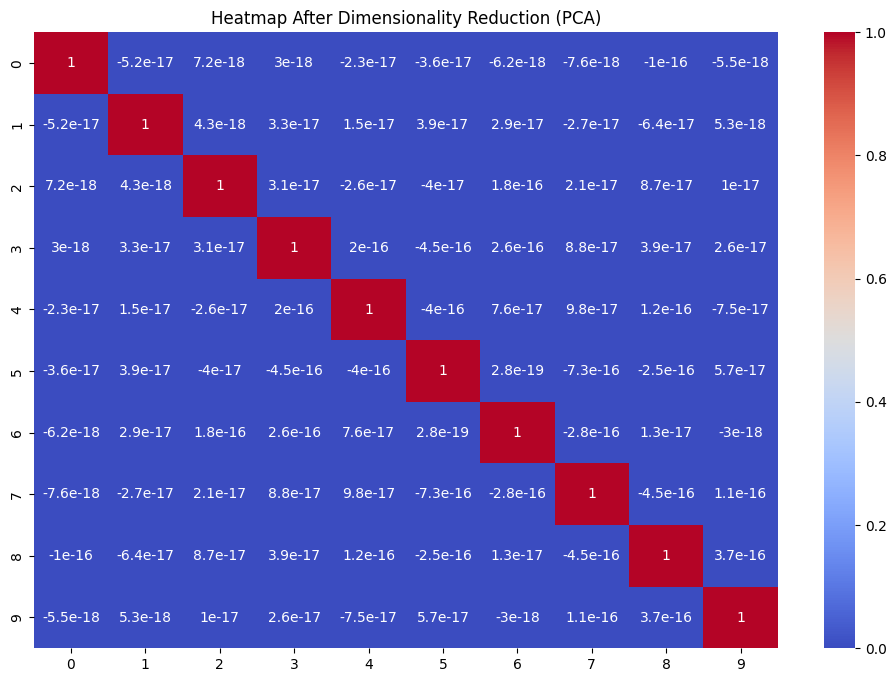

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=10)  
reduced_data = pca.fit_transform(df1.select_dtypes(include=['float64', 'int64']))


reduced_corr = pd.DataFrame(reduced_data).corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(reduced_corr, cmap="coolwarm", annot=True)
plt.title("Heatmap After Dimensionality Reduction (PCA)")
plt.show()

In [8]:
print ("Positive Sentiment:") 
print(TextBlob("the greatest").polarity )
print()
print(TextBlob("the greatest").sentiment)


Positive Sentiment:
1.0

Sentiment(polarity=1.0, subjectivity=1.0)


In [9]:
print (" Nagative Sentiment:") 
print (TextBlob("the worst").polarity)
print ()
print (TextBlob("the worst").sentiment)

 Nagative Sentiment:
-1.0

Sentiment(polarity=-1.0, subjectivity=1.0)


In [10]:
def detect_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [11]:
df2=df1[["text"]]

In [12]:
df2.head()

,text
0,"Its like that, if you want or not.“ ME: I have..."
1,I man the front desk and my title is HR Custom...
2,We'd be saving so much money with this new hou...
3,"My ex used to shoot back with ""Do you want me ..."
4,I haven’t said anything to him yet because I’m...


In [13]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)


In [14]:
df2.head()

,text,sentiment
0,"Its like that, if you want or not.“ ME: I have...",0.000000
1,I man the front desk and my title is HR Custom...,-0.065909
2,We'd be saving so much money with this new hou...,-0.036818
3,"My ex used to shoot back with ""Do you want me ...",-0.066667
4,I haven’t said anything to him yet because I’m...,0.141667


In [15]:
print("Minium Sentiment :", df2["sentiment"].min())
print("Maxium Sentiment :", df2["sentiment"].max())
print (df2.sentiment.value_counts())

Minium Sentiment : -1.0
Maxium Sentiment : 0.8
sentiment
 0.000000    21
 0.150000     5
 0.125000     4
 0.100000     4
-0.100000     4
             ..
 0.071429     1
 0.194444     1
-0.185000     1
-0.213611     1
 0.225000     1
Name: count, Length: 639, dtype: int64


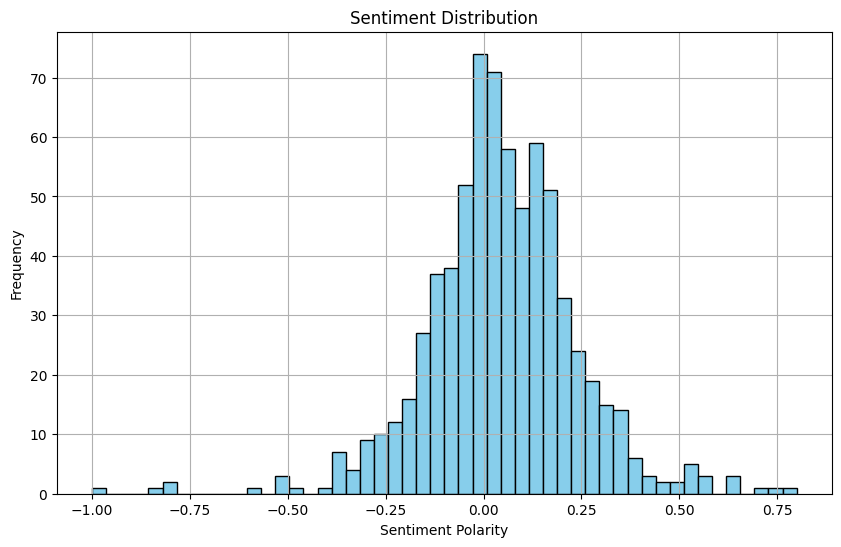

In [16]:
import matplotlib.pyplot as plt

df2["sentiment"].hist(bins=50, figsize=(10, 6), color="skyblue", edgecolor="black")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

In [17]:
df2['text']

0      Its like that, if you want or not.“ ME: I have...
1      I man the front desk and my title is HR Custom...
2      We'd be saving so much money with this new hou...
3      My ex used to shoot back with "Do you want me ...
4      I haven’t said anything to him yet because I’m...
                             ...                        
710    i have horrible vivid nightmares every night. ...
711    Also I can't think about both of them without ...
712    Furthermore, I told him before we got really s...
713    Here's the link to my amazon wish list where t...
714    How can I keep us protected? They have already...
Name: text, Length: 715, dtype: object

In [18]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
import re
import string
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english')).union(set(ENGLISH_STOP_WORDS))

import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def preprocess_text(text):

    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r"#\w+", '', text)
    text = re.sub(r"@\w+", '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    text = ' '.join([stemmer.stem(word) for word in word_tokenize(text)])
    
    return text

In [19]:
df2 ["text"]= df2["text"].apply(preprocess_text)
df2 ["text"]

0      it like that if you want or not “ me i have no...
1      i man the front desk and my titl is hr custom ...
2      wed be save so much money with thi new housrit...
3      my ex use to shoot back with do you want me to...
4      i haven ’ t said anyth to him yet becaus i ’ m...
                             ...                        
710    i have horribl vivid nightmar everi night some...
711    also i cant think about both of them without g...
712    furthermor i told him befor we got realli seri...
713    here the link to my amazon wish list where the...
714    how can i keep us protect they have alreadi be...
Name: text, Length: 715, dtype: object

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def wc(data, bgcolor='white'):
    plt.figure(figsize=(10, 10))  
    wordcloud = WordCloud(
        background_color=bgcolor,
        stopwords=STOPWORDS,
        width=800, 
        height=800
    ).generate(' '.join(data))  
    plt.imshow(wordcloud, interpolation='bilinear')  
    plt.axis("off")  
    plt.show()


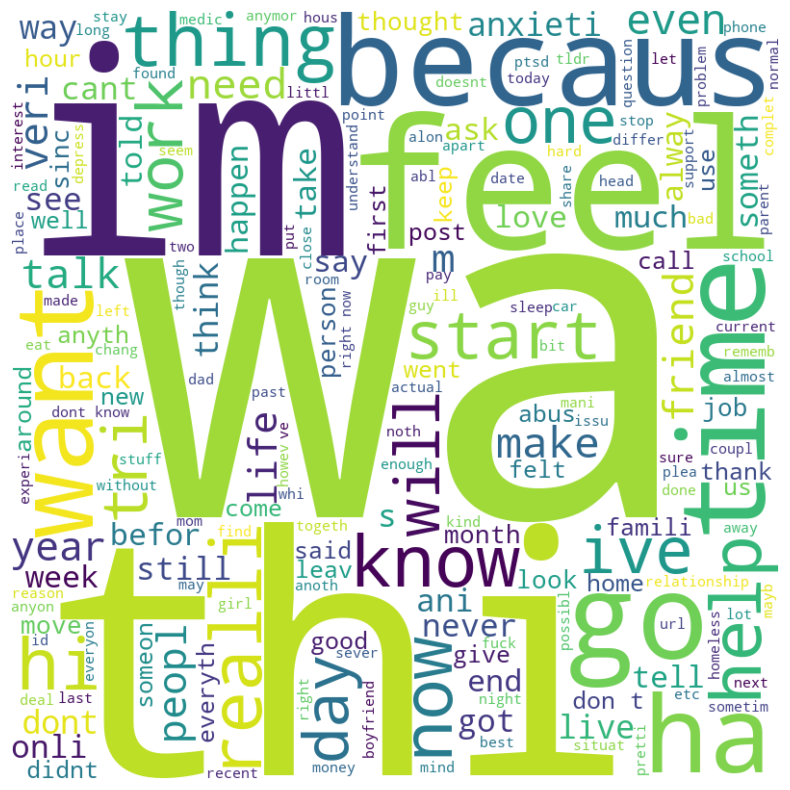

In [21]:
wc(df2['text'], bgcolor='white')


In [22]:
df2["sentiment_1"] = df2["text"].apply(detect_sentiment)
df2.head()

,text,sentiment,sentiment_1
0,it like that if you want or not “ me i have no...,0.000000,0.000000
1,i man the front desk and my titl is hr custom ...,-0.065909,-0.190909
2,wed be save so much money with thi new housrit...,-0.036818,-0.027273
3,my ex use to shoot back with do you want me to...,-0.066667,0.079167
4,i haven ’ t said anyth to him yet becaus i ’ m...,0.141667,0.225000


In [23]:
print("Minium Sentiment :", df2["sentiment_1"].min())
print("Maxium Sentiment :", df2["sentiment_1"].max())
print (df2.sentiment_1.value_counts())

Minium Sentiment : -0.8
Maxium Sentiment : 0.8
sentiment_1
 0.000000    30
 0.250000    13
 0.200000     8
 0.125000     5
 0.500000     5
             ..
 0.240000     1
-0.240000     1
-0.226852     1
 0.700000     1
 0.106061     1
Name: count, Length: 571, dtype: int64


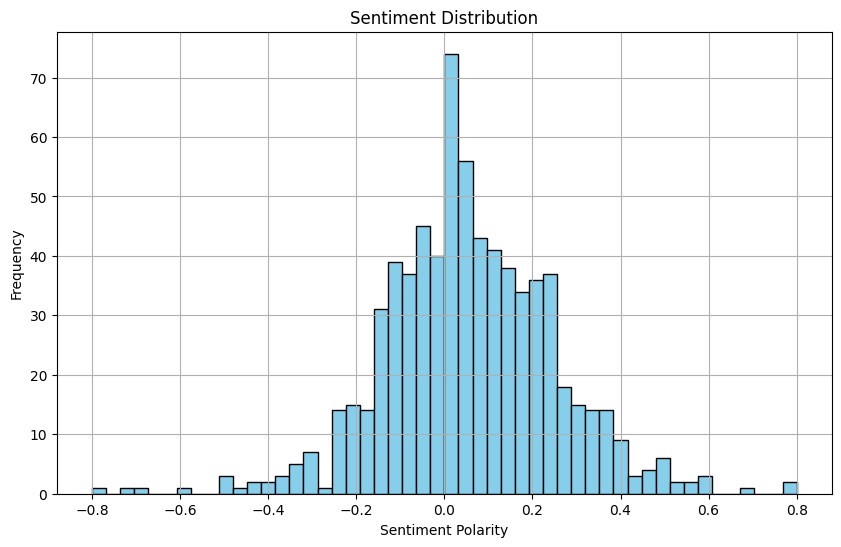

In [24]:
import matplotlib.pyplot as plt

df2["sentiment_1"].hist(bins=50, figsize=(10, 6), color="skyblue", edgecolor="black")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

In [25]:
correlation = df2["sentiment"].corr(df2["sentiment_1"])
print("Correlation between sentiment and sentiment_1:", correlation)

Correlation between sentiment and sentiment_1: 0.7284738342897107


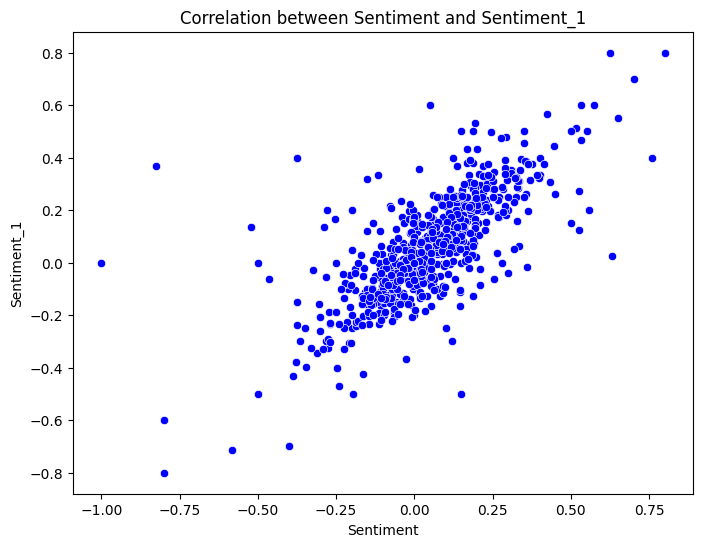

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2["sentiment"], y=df2["sentiment_1"], color="blue")
plt.title("Correlation between Sentiment and Sentiment_1")
plt.xlabel("Sentiment")
plt.ylabel("Sentiment_1")
plt.show()

In [27]:
df2["sentiment_diff"] = abs(df2["sentiment"] - df2["sentiment_1"])
outliers = df2[df2["sentiment_diff"] > 0.5]
outliers

,text,sentiment,sentiment_1,sentiment_diff
140,she ’ s in play therapi onc a week but haven ’...,-0.375000,0.400000,0.775000
158,i assum she would answer the question or she w...,0.050000,0.600000,0.550000
437,3 i wa meet with someon 4 becaus i ’ m so tire...,-0.522222,0.136364,0.658586
474,they look noth like my growth she told me i wa...,-1.000000,0.000000,1.000000
497,tomorrow i buri my best friend who tragic pass...,0.631250,0.025000,0.606250
572,i know after we talk ill be abl to speak with ...,0.150000,-0.500000,0.650000
619,it is quit annoy i get diarrhea when i get pan...,-0.825000,0.366667,1.191667


In [28]:
df2["combined_sentiment"] = (df2["sentiment"] + df2["sentiment_1"]) / 2
df2.head()

,text,sentiment,sentiment_1,sentiment_diff,combined_sentiment
0,it like that if you want or not “ me i have no...,0.000000,0.000000,0.000000,0.000000
1,i man the front desk and my titl is hr custom ...,-0.065909,-0.190909,0.125000,-0.128409
2,wed be save so much money with thi new housrit...,-0.036818,-0.027273,0.009545,-0.032045
3,my ex use to shoot back with do you want me to...,-0.066667,0.079167,0.145833,0.006250
4,i haven ’ t said anyth to him yet becaus i ’ m...,0.141667,0.225000,0.083333,0.183333


In [29]:
df2["combined_sentiment"].iloc[[140, 158, 437,474,497,572,619]]

140    0.012500
158    0.325000
437   -0.192929
474   -0.500000
497    0.328125
572   -0.175000
619   -0.229167
Name: combined_sentiment, dtype: float64

In [30]:
df2.loc[[140, 158, 437, 474, 497, 572, 619], 'sentiment_1'] = df2.loc[[140, 158, 437, 474, 497, 572, 619], 'combined_sentiment']
print ( df2["sentiment_1"].iloc[[140, 158, 437,474,497,572,619]])

140    0.012500
158    0.325000
437   -0.192929
474   -0.500000
497    0.328125
572   -0.175000
619   -0.229167
Name: sentiment_1, dtype: float64


In [31]:
def label_sentiment(value):
    if value < 0:
        return "Negative"
    else:
        return "Positive"
df2["sentiment_label"] = df2["sentiment_1"].apply(label_sentiment)
df2=df2[['text','sentiment_1','sentiment_label']]
df2.head()


,text,sentiment_1,sentiment_label
0,it like that if you want or not “ me i have no...,0.000000,Positive
1,i man the front desk and my titl is hr custom ...,-0.190909,Negative
2,wed be save so much money with thi new housrit...,-0.027273,Negative
3,my ex use to shoot back with do you want me to...,0.079167,Positive
4,i haven ’ t said anyth to him yet becaus i ’ m...,0.225000,Positive


In [32]:
print(df2["sentiment_label"].value_counts())

sentiment_label
Positive    449
Negative    266
Name: count, dtype: int64


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

tfidf = TfidfVectorizer(max_features=100)  
text_features = tfidf.fit_transform(df2['text']).toarray()

df2['sentiment_1'] = df2['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [34]:
print(df2[['text', 'sentiment_1']].head()) 
print("Shape of TF-IDF features:", text_features.shape) 

                                                text  sentiment_1
0  it like that if you want or not “ me i have no...     0.000000
1  i man the front desk and my titl is hr custom ...    -0.190909
2  wed be save so much money with thi new housrit...    -0.027273
3  my ex use to shoot back with do you want me to...     0.079167
4  i haven ’ t said anyth to him yet becaus i ’ m...     0.225000
Shape of TF-IDF features: (715, 100)


In [35]:
import numpy as np

combined_features = np.hstack([text_features, df2[['sentiment_1']].values])

print("Shape of combined features:", combined_features.shape)

Shape of combined features: (715, 101)


<Axes: xlabel='sentiment_label', ylabel='count'>

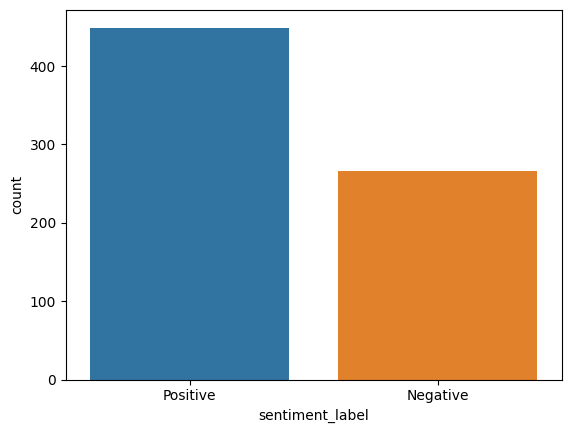

In [36]:
import seaborn as sns
sns.countplot(x='sentiment_label',data=df2)

In [37]:
df2=df2[['text','sentiment_label']]
df2['label']=df2['sentiment_label']. map({"Negative":0, "Positive": 1})
df2.head()

,text,sentiment_label,label
0,it like that if you want or not “ me i have no...,Positive,1
1,i man the front desk and my titl is hr custom ...,Negative,0
2,wed be save so much money with thi new housrit...,Negative,0
3,my ex use to shoot back with do you want me to...,Positive,1
4,i haven ’ t said anyth to him yet becaus i ’ m...,Positive,1


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words="english")
matrix=vect.fit_transform(df2.text).toarray()
x=matrix
y=df2["label"].values

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(
    combined_features, df2['label'], test_size=0.2, random_state=42
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

Confusion Matrix:
 [[50  6]
 [ 6 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        56
           1       0.93      0.93      0.93        87

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

Accuracy: 0.916


In [40]:
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def predict_new_text(model, tfidf, scaler, new_text):
    text_features = tfidf.transform([new_text]).toarray()
    sentiment = TextBlob(new_text).sentiment.polarity
    combined_features = np.hstack([text_features, np.array([[sentiment]])])

    combined_features = scaler.transform(combined_features)
    prediction = model.predict(combined_features)
    
    return prediction[0]

new_text = "I hate my self, i wannna die"
prediction = predict_new_text(model, tfidf, scaler, new_text)
print(f"Prediction for the new text: {prediction}")

Prediction for the new text: 0


Attributes Entropy:
id: 6.5723
subreddit: 2.0360
post_id: 6.2847
sentence_range: 3.5534
text: 6.5723
label: 0.6926
confidence: 1.6488
social_timestamp: 6.2847
social_karma: 3.1841
syntax_ari: 6.5393
lex_liwc_WC: 4.6337
lex_liwc_Analytic: 6.1293
lex_liwc_Clout: 5.9454
lex_liwc_Authentic: 5.3045
lex_liwc_Tone: 4.2685
lex_liwc_WPS: 4.9792
lex_liwc_Sixltr: 5.8824
lex_liwc_Dic: 5.8380
lex_liwc_function: 5.9811
lex_liwc_pronoun: 5.8969
lex_liwc_ppron: 5.8326
lex_liwc_i: 5.7222
lex_liwc_we: 2.0919
lex_liwc_you: 1.7005
lex_liwc_shehe: 3.3618
lex_liwc_they: 1.8415
lex_liwc_ipron: 5.6078
lex_liwc_article: 5.5178
lex_liwc_prep: 5.6565
lex_liwc_auxverb: 5.7334
lex_liwc_adverb: 5.6427
lex_liwc_conj: 5.5708
lex_liwc_negate: 4.6662
lex_liwc_verb: 5.7955
lex_liwc_adj: 5.4997
lex_liwc_compare: 4.7784
lex_liwc_interrog: 4.0970
lex_liwc_number: 3.5451
lex_liwc_quant: 4.7470
lex_liwc_affect: 5.6547
lex_liwc_posemo: 4.7483
lex_liwc_negemo: 5.0176
lex_liwc_anx: 2.9500
lex_liwc_anger: 2.8267
lex_liwc_sad: 2.

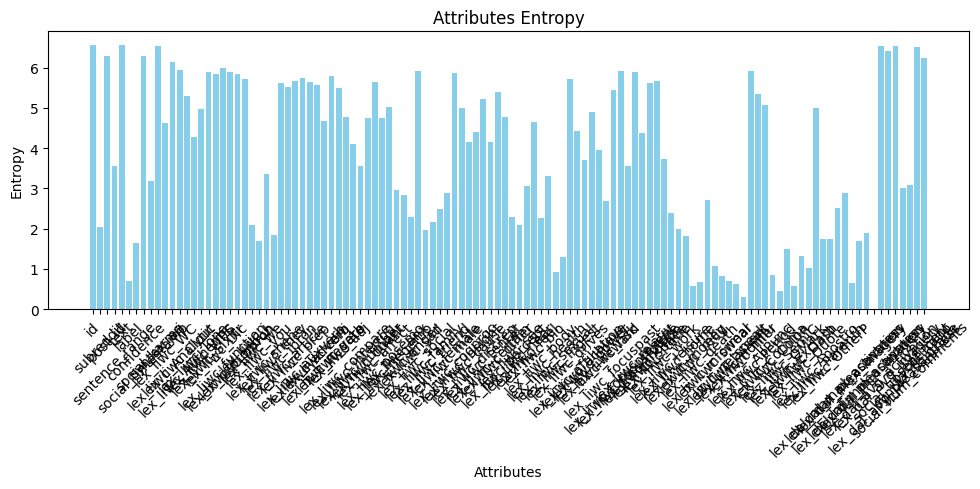

In [41]:
# Cell 1: Compute and Visualize Attributes Entropy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Load the data
df = pd.read_csv("/kaggle/input/dataset-for-stress-analysis-in-social-media/dreaddit_StressAnalysis - Sheet1.csv")

# Function to compute entropy for a pandas Series
def compute_entropy(col):
    counts = col.value_counts()
    return entropy(counts)

# Compute entropy for each attribute/column
entropy_dict = {}
for col in df.columns:
    # Drop missing values for a fair calculation
    entropy_dict[col] = compute_entropy(df[col].dropna())

# Print the entropy values
print("Attributes Entropy:")
for col, ent in entropy_dict.items():
    print(f"{col}: {ent:.4f}")

# Visualize the entropy values in a bar plot
plt.figure(figsize=(10, 5))
plt.bar(entropy_dict.keys(), entropy_dict.values(), color='skyblue')
plt.title("Attributes Entropy")
plt.xlabel("Attributes")
plt.ylabel("Entropy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train, y_train)

y_pred_dt = model_dt.predict(x_test)

print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt), 3))


Decision Tree Confusion Matrix:
 [[54  2]
 [ 0 87]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.98      1.00      0.99        87

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

Decision Tree Accuracy: 0.986


In [43]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)

print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))


Random Forest Confusion Matrix:
 [[54  2]
 [ 0 87]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.98      1.00      0.99        87

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

Random Forest Accuracy: 0.986


In [44]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

y_pred_nb = model_nb.predict(x_test)

print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy:", round(accuracy_score(y_test, y_pred_nb), 3))


Naive Bayes Confusion Matrix:
 [[31 25]
 [27 60]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.55      0.54        56
           1       0.71      0.69      0.70        87

    accuracy                           0.64       143
   macro avg       0.62      0.62      0.62       143
weighted avg       0.64      0.64      0.64       143

Naive Bayes Accuracy: 0.636


In [45]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(x_train, y_train)

y_pred_svm = model_svm.predict(x_test)

print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", round(accuracy_score(y_test, y_pred_svm), 3))


SVM Confusion Matrix:
 [[48  8]
 [ 4 83]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        56
           1       0.91      0.95      0.93        87

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

SVM Accuracy: 0.916


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(x_train, y_train)

y_pred_gb = model_gb.predict(x_test)

print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting Accuracy:", round(accuracy_score(y_test, y_pred_gb), 3))


Gradient Boosting Confusion Matrix:
 [[54  2]
 [ 0 87]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.98      1.00      0.99        87

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

Gradient Boosting Accuracy: 0.986


In [47]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(x_train, y_train)

y_pred_xgb = model_xgb.predict(x_test)

print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 3))


XGBoost Confusion Matrix:
 [[54  2]
 [ 0 87]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.98      1.00      0.99        87

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

XGBoost Accuracy: 0.986


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

# Load the dataset
df = pd.read_csv("/kaggle/input/dataset-for-stress-analysis-in-social-media/dreaddit_StressAnalysis - Sheet1.csv")  # Ensure this file is available
from sklearn.preprocessing import LabelEncoder

# Select only object (categorical) columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categorical to numeric
    label_encoders[col] = le  # Store encoder for inverse transformation if needed

print("Categorical Columns Encoded:", categorical_columns)

# Select feature columns based on the entropy list (excluding 'label')
feature_columns = [
    "subreddit", "sentence_range", "confidence", "social_timestamp", "social_karma", "syntax_ari",
    "lex_liwc_WC", "lex_liwc_Analytic", "lex_liwc_Clout", "lex_liwc_Authentic", "lex_liwc_Tone",
    "lex_liwc_WPS", "lex_liwc_Sixltr", "lex_liwc_Dic", "lex_liwc_function", "lex_liwc_pronoun",
    "lex_liwc_ppron", "lex_liwc_i", "lex_liwc_auxverb", "lex_liwc_adverb", "lex_liwc_conj",
    "lex_liwc_negate", "lex_liwc_verb", "lex_liwc_adj", "lex_liwc_affect", "lex_liwc_posemo",
    "lex_liwc_negemo", "lex_liwc_social", "lex_liwc_cogproc", "lex_liwc_percept", "lex_liwc_bio",
    "lex_liwc_drives", "lex_liwc_power", "lex_liwc_focuspast", "lex_liwc_focuspresent", "lex_liwc_relativ",
    "lex_liwc_motion", "lex_liwc_space", "lex_liwc_time", "lex_liwc_work", "lex_liwc_money",
    "lex_liwc_informal", "lex_liwc_swear", "lex_liwc_AllPunc", "lex_liwc_Period", "lex_liwc_Comma",
    "lex_dal_max_activation", "lex_dal_avg_activation", "lex_dal_avg_pleasantness",
    "social_upvote_ratio", "social_num_comments", "syntax_fk_grade"
]

# Define input features (X) and target variable (y)
X = df[feature_columns]
y = df["label"]

# Handle missing values
X = X.fillna(X.median())

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Feature Selection
selector = SelectFromModel(clf, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_features = np.array(feature_columns)[selector.get_support()]

print("Selected Features based on Decision Tree:")
print(selected_features)


Categorical Columns Encoded: Index(['subreddit', 'post_id', 'sentence_range', 'text'], dtype='object')
Selected Features based on Decision Tree:
['confidence' 'lex_liwc_Clout' 'lex_liwc_Tone' 'lex_liwc_Sixltr'
 'lex_liwc_i' 'lex_liwc_conj' 'lex_liwc_bio' 'lex_liwc_focuspast'
 'lex_liwc_motion' 'lex_liwc_money' 'lex_liwc_AllPunc' 'lex_liwc_Comma'
 'lex_dal_max_activation' 'lex_dal_avg_activation']


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


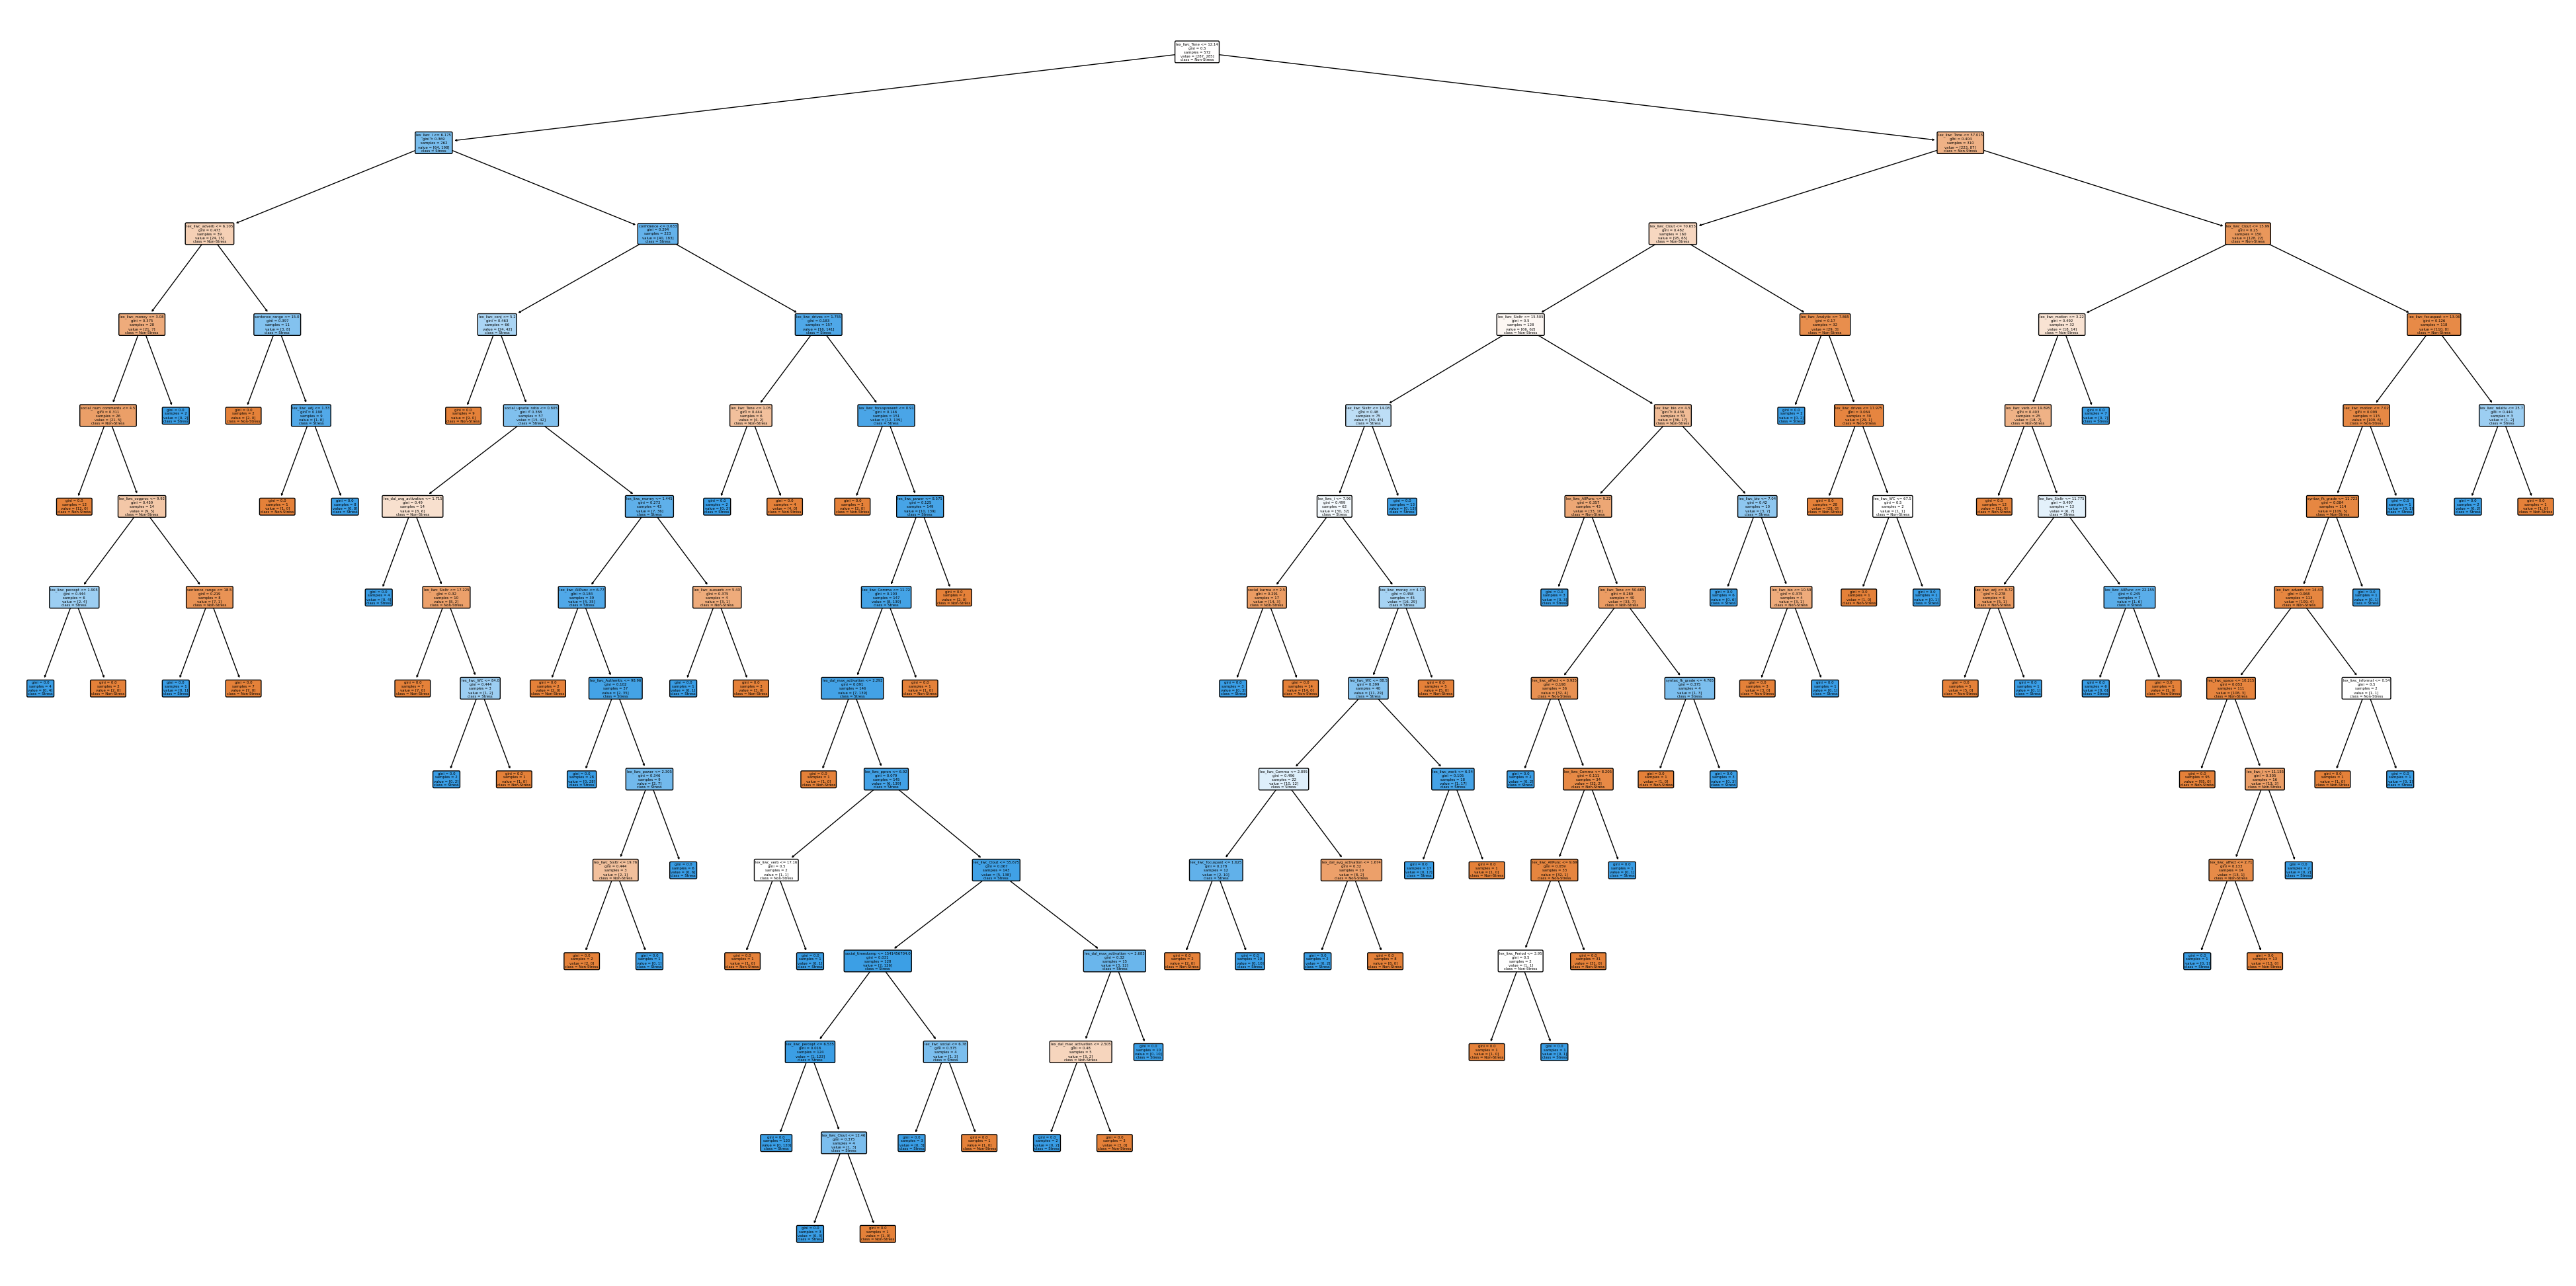

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(50,25))  # Set figure size for better readability
plot_tree(clf, feature_names=feature_columns, class_names=["Non-Stress", "Stress"], filled=True, rounded=True)
plt.show()
